<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_clasif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Perpustakaan awal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
#perpustakaan untuk impordata
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#instalasi regressor
!pip install catboost #catboost
!pip install lightgbm #lightbgm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.4 MB/s eta 0:00:00


In [4]:
#instalasi paket (p1)
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#lanjut

In [5]:
#Bagian 2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
#Robust scaler
from sklearn.preprocessing import RobustScaler

In [57]:
#instalasi precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score

In [8]:
#instalasi xgboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 2.2 MB/s eta 0:00:00


In [9]:
#instalasi regressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
#lanjutan impor regresor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [10]:
#Pemeriksaan data
#Instalasi dataset dari Google Drive
clabnb = pd.read_csv('/content/drive/MyDrive/csv-files/clusairbnb.csv')
#persiapan salinan
clabnbii = clabnb.copy()
clabnbii.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
0,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4,1,194,unit asing
1,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1,4,188,unit asing
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1,1,46,unit asing
3,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1,1,321,unit asing
4,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4,1,21,unit asing
5,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0,2,233,unit asing
6,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1,2,22,unit asing


In [11]:
#pengubahan identitas ke kolom kata-kata
clabnbii[['id','host_id']] = clabnbii[['id','host_id']].astype(str).copy()
clabnbii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
#Persiapan aspek numerikal melalui inspeksi kolom numerik
numdf = clabnbii.select_dtypes(include=[np.number]).copy()
numdf.info()
#ke eksekusi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  int64  
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.0 MB


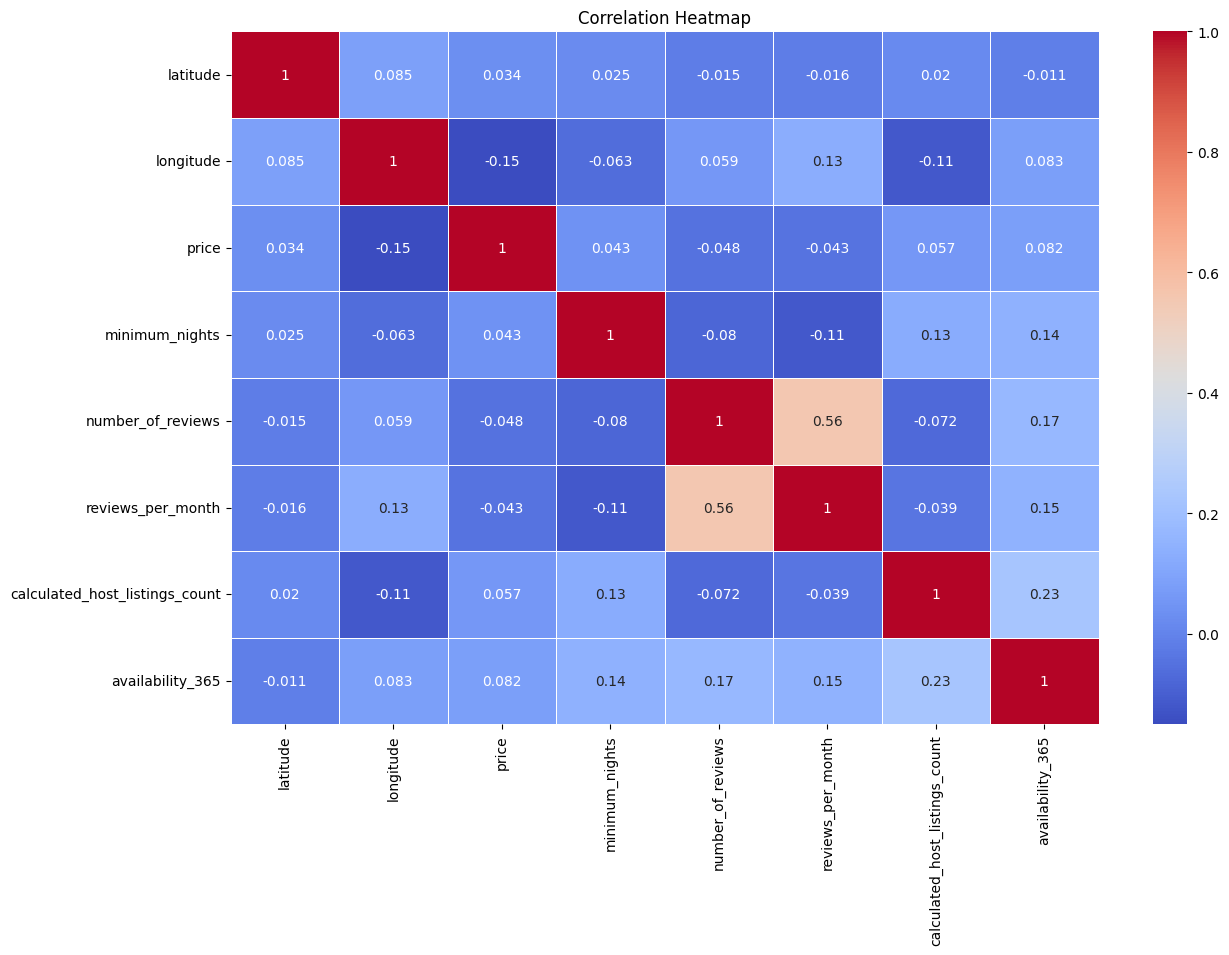

In [14]:
#Pemeriksaan matriks korelasi
matkor = numdf.corr()
#ilustrasi grafik melalui denag
plt.figure(figsize=(14, 9))
sns.heatmap(matkor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [15]:
#Inspeksi tahap awal
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  int64  
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.0 MB


In [20]:
#pengambilan kolom dari harga
clasdf = numdf.iloc[:, 2:].copy()
clasdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           48895 non-null  int64
 1   minimum_nights                  48895 non-null  int64
 2   number_of_reviews               48895 non-null  int64
 3   reviews_per_month               48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


- Harga dan lima indikator lainya menjadi penentu
- Tujuan pemakaian kopi adalah **"Penjagaan data asli"**

In [21]:
#Persiapan 'standardisasi' melalui "Robust scaler"
scaler = RobustScaler()

In [27]:
#pengubahan dataset ke bentuk standar
clasdfsca = scaler.fit_transform(clasdf) #sudah distandardisasi
clasdfsca = pd.DataFrame(clasdfsca, columns=clasdf.columns) #ubah ke df
clasdfsca.head(7)#cek hasil

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.160377,-0.50,11.521739,4.0,0.0,0.656388
1,0.415094,-0.50,6.739130,1.0,3.0,0.629956
2,0.320755,-0.25,6.217391,1.0,0.0,0.004405
3,1.028302,-0.25,8.391304,1.0,0.0,1.215859
4,-0.066038,0.00,2.086957,4.0,0.0,-0.105727
5,0.132075,-0.25,3.608696,0.0,1.0,0.828194
6,-0.198113,-0.25,9.826087,1.0,1.0,-0.101322


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [28]:
#deklarasi X dan y
y = clasdfsca['price'].copy() #Harga
#ke X

In [29]:
#deklarasi X
X = clasdfsca.drop('price', axis=1).copy() #semua kolom kecuali harga

In [35]:
#Persiapan latihan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

Proses awal menggunakan rasio 3:1 untuk (latihan dan tes)

aspek yang diperhatikan
* y adalah harga (dalam USD)
* x dalah indikator lain seperti
- * Malam minimal
- * total ulasan
- * ulasan bulanan
- * total properti dari pemilik
- * jumlah hari kamar tersedia dalam satu tahun

In [36]:
#Inisiasi model
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
#target minimal (87%)
minr2 = 0.87 #Nilai minimal R²

In [42]:
#Deklarasi fungsi
def log_results(name, rmse, r2, mae, mse, execution_time):
    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"Nilai MAE: {round(mae, 4)} ({name})")
    print(f"Nilai MSE: {round(mse, 4)} ({name})")
    print(f"Waktu Eksekusi : {round(execution_time, 2)} detik\n")
#Ke iterasi

In [43]:
#Bagian iterasi
for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Check RMSE value
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Inspect R² value
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate execution time
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Log results using the new function
    log_results(name, rmse, r2, mae, mse, execution_time)

    # Check if R² value meets the threshold
    if r2 >= minr2:
        print(f"Penghentian dimulai karena Target nilai R² tercapai di {name}.")
        break  # Stop execution if target R² is reached
#ke

RMSE: 2.2969 (LR)
R^2 Score: 0.0105 (LR)
Nilai MAE: 0.8593 (LR)
Nilai MSE: 5.6682 (LR)
Waktu Eksekusi : 0.07 detik

RMSE: 2.2969 (Ridge)
R^2 Score: 0.0105 (Ridge)
Nilai MAE: 0.8593 (Ridge)
Nilai MSE: 5.6682 (Ridge)
Waktu Eksekusi : 0.07 detik

RMSE: 2.2445 (Lasso)
R^2 Score: 0.0026 (Lasso)
Nilai MAE: 0.8608 (Lasso)
Nilai MSE: 5.7135 (Lasso)
Waktu Eksekusi : 0.87 detik

RMSE: 2.2444 (ElasticNet)
R^2 Score: 0.0027 (ElasticNet)
Nilai MAE: 0.8602 (ElasticNet)
Nilai MSE: 5.7132 (ElasticNet)
Waktu Eksekusi : 0.75 detik

RMSE: 2.612 (KNN)
R^2 Score: -0.0029 (KNN)
Nilai MAE: 0.8738 (KNN)
Nilai MSE: 5.7451 (KNN)
Waktu Eksekusi : 1.15 detik

RMSE: 3.1895 (CART)
R^2 Score: -0.4284 (CART)
Nilai MAE: 1.0227 (CART)
Nilai MSE: 8.1829 (CART)
Waktu Eksekusi : 0.64 detik

RMSE: 2.6615 (RF)
R^2 Score: 0.0191 (RF)
Nilai MAE: 0.8663 (RF)
Nilai MSE: 5.6195 (RF)
Waktu Eksekusi : 43.05 detik

RMSE: 2.349 (GBM)
R^2 Score: 0.0445 (GBM)
Nilai MAE: 0.8262 (GBM)
Nilai MSE: 5.4735 (GBM)
Waktu Eksekusi : 10.15 detik

## Tulis narasi atau penjelasan algoritma yang Anda gunakan.
### Narasi pemakaian Algoritma
#### a. Persiapan standardisasi dataset sebelum pemisahan menjadi X dan y melalui *"*Robustscaler"**
#### b. Pemisahan menjadi bagian 'X' dan 'y' dan bagian latihan dan tes
#### c. Komposisi pemeriksaan meliputi
- Regresi linear
- Inspeksi **'XGBOOST'**
- Teknik laso
- Metode 'K nearest Neighboorhood'

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [44]:
#Bagian inspeksi data melalui metrik kalkulasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.8115
MSE: 5.2461
RMSE: 2.2904
R²: 0.0842


In [46]:
#Bagian pemeriksaan nilai (awal deklarasi)
# Penyetelan
evamod = [
    ('LR', LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ("XGBoost", XGBRegressor(objective='reg:squarederror')),
    ("LightGBM", LGBMRegressor()),
    ("CatBoost", CatBoostRegressor(verbose=False))
]

# Daftar skor
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

# Target minimal (87%)
min_r2 = 0.87  # Nilai minimal R²
threshold = 0.1  # Deklarasi Teshold
# ke bagian iterasi

In [47]:
#iterasi untuk pemeriksaan
for name, regressor in evamod:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Check RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Inspect R² score
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate execution time
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Calculate F1 score based on a threshold
    absolute_errors = np.abs(y_test - y_pred)
    correct_predictions = absolute_errors <= (threshold * y_test)

    true_positive = np.sum(correct_predictions)
    precision = true_positive / len(y_test) if len(y_test) > 0 else 0
    recall = true_positive / len(y_test) if len(y_test) > 0 else 0

    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store performance metrics
    metrics_dict = {
        "name": name,
        "rmse": rmse,
        "r2": r2,
        "mae": mae,
        "mse": mse,
        "execution_time": execution_time,
        "f1_score": f1_score
    }

    # Break if the target R² or F1 score is reached
    if r2 >= min_r2 or f1_score >= 0.87:
        print(f"Stopping because the target R² or F1 score is reached with {name}.")
        break  # Stopping condition

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 36671, number of used features: 5
[LightGBM] [Info] Start training from score 0.440142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 39116, number of used features: 5
[LightGBM] [Info] Start training from score 0.312416
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 39116, number of used features: 5
[LightGBM] [Info] Start training 

In [50]:
#pemeriksaan inspeksi
print(f"Model: {metrics_dict['name']}")
print(f"RMSE: {round(metrics_dict['rmse'], 4)}")
print(f"R² Score: {round(metrics_dict['r2'], 4)}")
print(f"MAE: {round(metrics_dict['mae'], 4)}")
print(f"MSE: {round(metrics_dict['mse'], 4)}")
print(f"Execution Time: {round(metrics_dict['execution_time'], 2)} seconds")
print(f"F1 Score: {round(metrics_dict['f1_score'], 4)}")
print("-" * 40)  # Separator line

Model: CatBoost
RMSE: 2.545
R² Score: 0.0842
MAE: 0.8115
MSE: 5.2461
Execution Time: 21.35 seconds
F1 Score: 0.0294
----------------------------------------


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [55]:
#Inisiasi gridsearch (deklarasi)
gridmod = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

# Inisiasi target
results = []

In [54]:
#penulisan pasca pemakaian Gridsearch
param_grids = {
    'LR': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'KNN': {'n_neighbors': [1, 3, 5, 7]},
    'CART': {'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2]},
    'RF': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10]},
    'GBM': {'n_estimators': [10, 50], 'learning_rate': [0.001, 0.01]},
    'XGBoost': {'n_estimators': [10, 50], 'learning_rate': [0.001, 0.01]},
    'LightGBM': {'n_estimators': [10, 50], 'learning_rate': [0.001, 0.01]},
    'CatBoost': {'iterations': [10, 50], 'learning_rate': [0.001, 0.01], 'depth': [4, 5, 6]}
}

In [58]:
#iterasi gridsearch
for name, regressor in gridmod:
    print(f"Hyperparameter Tuning for {name}:")
    start_time = time.time()

    # Perform grid search if parameter grid exists
    if param_grids[name]:
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # If applicable (for classification tasks), calculate precision, recall, and F1 score
    if hasattr(best_model, "predict_proba"):  # Check if model supports probability prediction
        y_pred_class = (y_pred > 0.5).astype(int)  # Assuming binary classification with threshold at 0.5
        precision = precision_score(y_test, y_pred_class)
        recall = recall_score(y_test, y_pred_class)
        f1 = f1_score(y_test, y_pred_class)
    else:
        precision = recall = f1 = None  # Not applicable for regression models

    # Calculate the execution time of the model
    execution_time = time.time() - start_time

    # Check if metrics meet the target threshold of 87%
    metrics_check = {
        'R^2 Score': r2 >= 0.87,
        'Precision': precision >= 0.87 if precision is not None else None,
        'Recall': recall >= 0.87 if recall is not None else None,
        'F1 Score': f1 >= 0.87 if f1 is not None else None,
    }

    # Store results in a dictionary
    results.append({
        'Model': name,
        'RMSE': round(rmse, 4),
        'R^2 Score': round(r2, 4),
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'Execution Time (s)': round(execution_time, 2),
        'Metrics Check': metrics_check,
    })
#ke pencetakan hasil

Hyperparameter Tuning for LR:
Hyperparameter Tuning for Ridge:
Best parameters: {'alpha': 0.01}
Hyperparameter Tuning for Lasso:
Best parameters: {'alpha': 0.01}
Hyperparameter Tuning for ElasticNet:
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Hyperparameter Tuning for KNN:
Best parameters: {'n_neighbors': 7}
Hyperparameter Tuning for CART:
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1}
Hyperparameter Tuning for RF:
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Hyperparameter Tuning for GBM:
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Hyperparameter Tuning for XGBoost:
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Hyperparameter Tuning for LightGBM:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 36671, number of used features:

In [59]:
#Deklarasi hasil
for result in results:
    print(result)

{'Model': 'LR', 'RMSE': 2.3808, 'R^2 Score': 0.0105, 'MAE': 0.8593, 'MSE': 5.6682, 'Execution Time (s)': 0.01}
{'Model': 'Ridge', 'RMSE': 2.3808, 'R^2 Score': 0.0105, 'MAE': 0.8593, 'MSE': 5.6682, 'Execution Time (s)': 4.5}
{'Model': 'Lasso', 'RMSE': 2.3807, 'R^2 Score': 0.0107, 'MAE': 0.858, 'MSE': 5.6676, 'Execution Time (s)': 1.02}
{'Model': 'ElasticNet', 'RMSE': 2.3807, 'R^2 Score': 0.0106, 'MAE': 0.8588, 'MSE': 5.6677, 'Execution Time (s)': 1.77}
{'Model': 'KNN', 'RMSE': 2.2964, 'R^2 Score': 0.0795, 'MAE': 0.8445, 'MSE': 5.2734, 'Execution Time (s)': 1.52}
{'Model': 'CART', 'RMSE': 2.3431, 'R^2 Score': 0.0417, 'MAE': 0.8449, 'MSE': 5.49, 'Execution Time (s)': 0.99}
{'Model': 'RF', 'RMSE': 2.2957, 'R^2 Score': 0.08, 'MAE': 0.8143, 'MSE': 5.2702, 'Execution Time (s)': 9.76}
{'Model': 'GBM', 'RMSE': 2.3787, 'R^2 Score': 0.0123, 'MAE': 0.8562, 'MSE': 5.6584, 'Execution Time (s)': 1.86}
{'Model': 'XGBoost', 'RMSE': 2.3525, 'R^2 Score': 0.0339, 'MAE': 0.8431, 'MSE': 5.5342, 'Execution T

In [60]:
#Konversi ke bentuk data
results_df = pd.DataFrame(results)
#ke grafik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

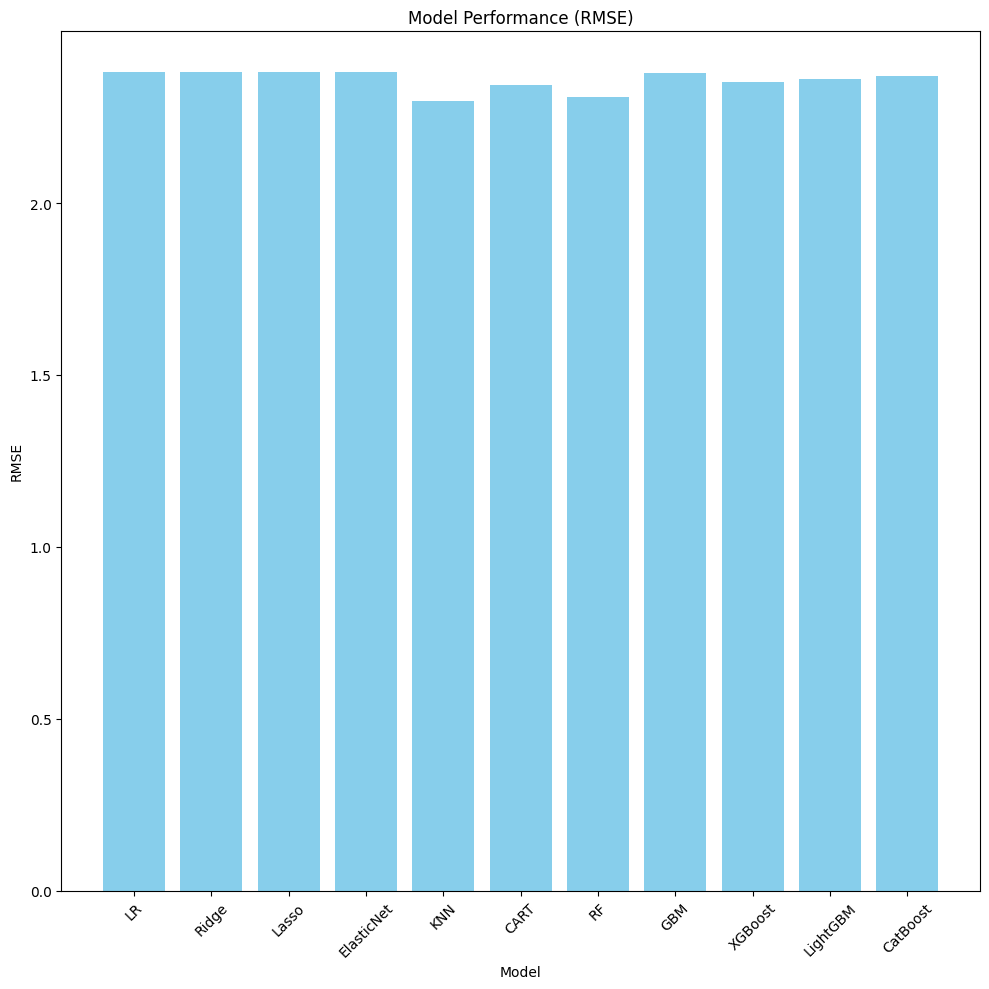

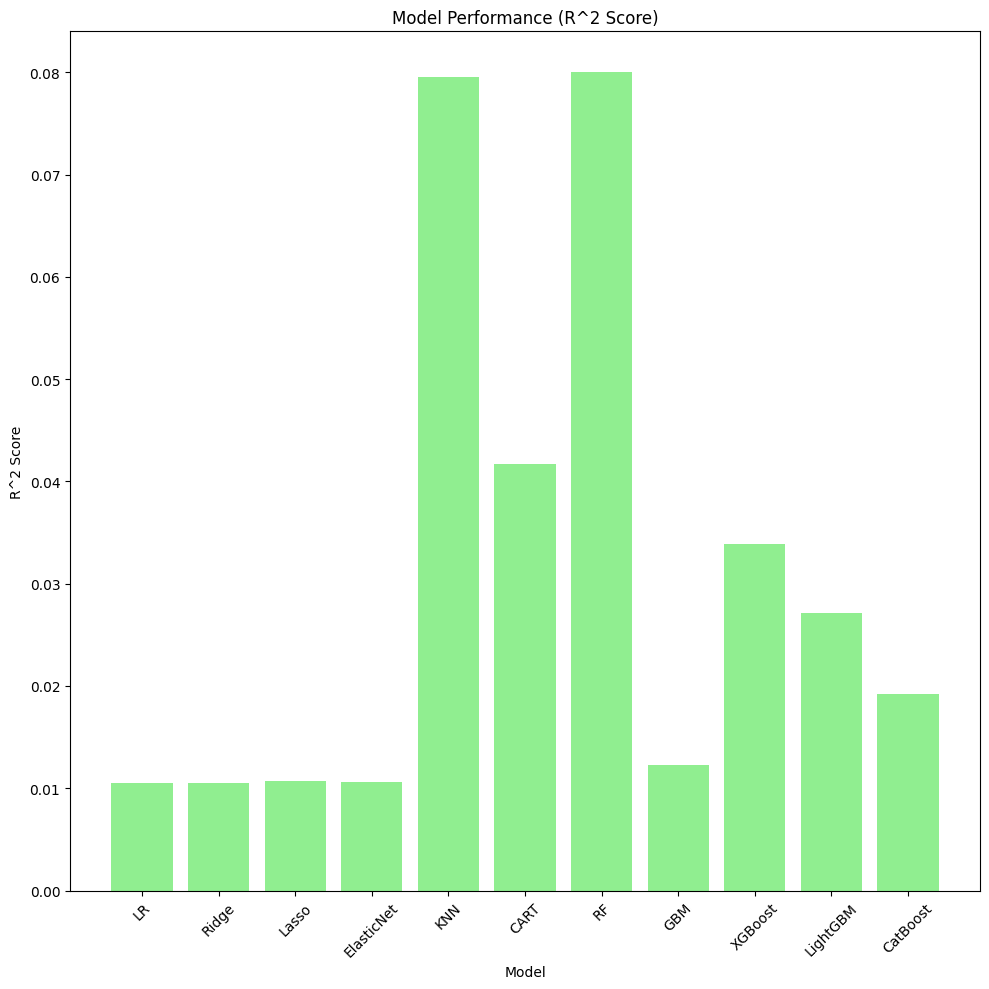

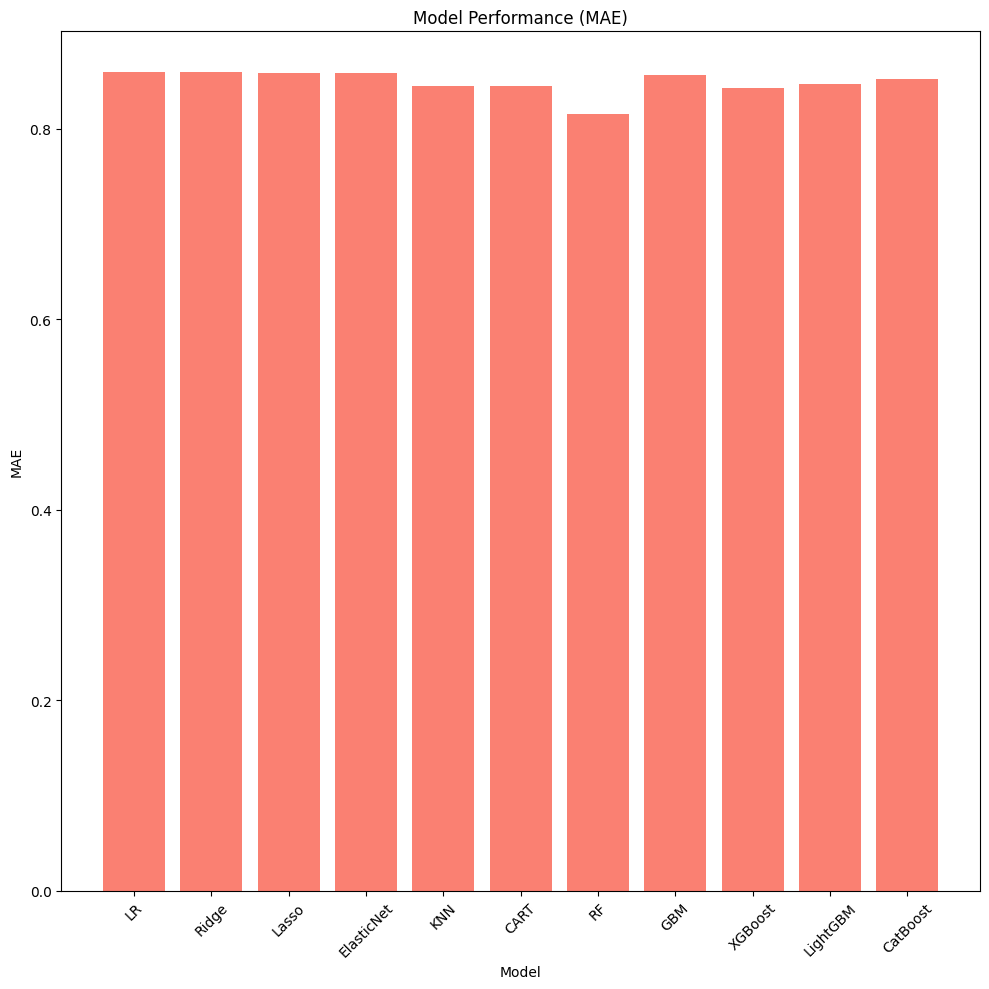

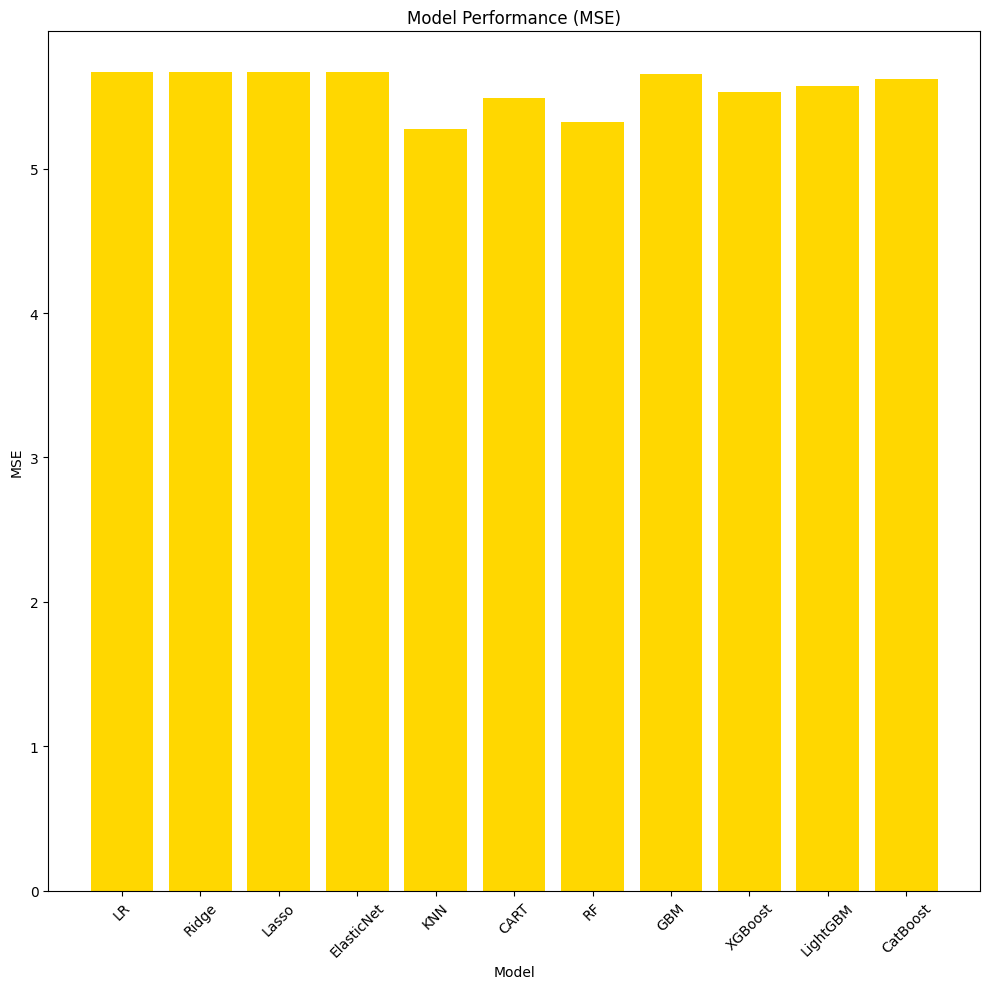

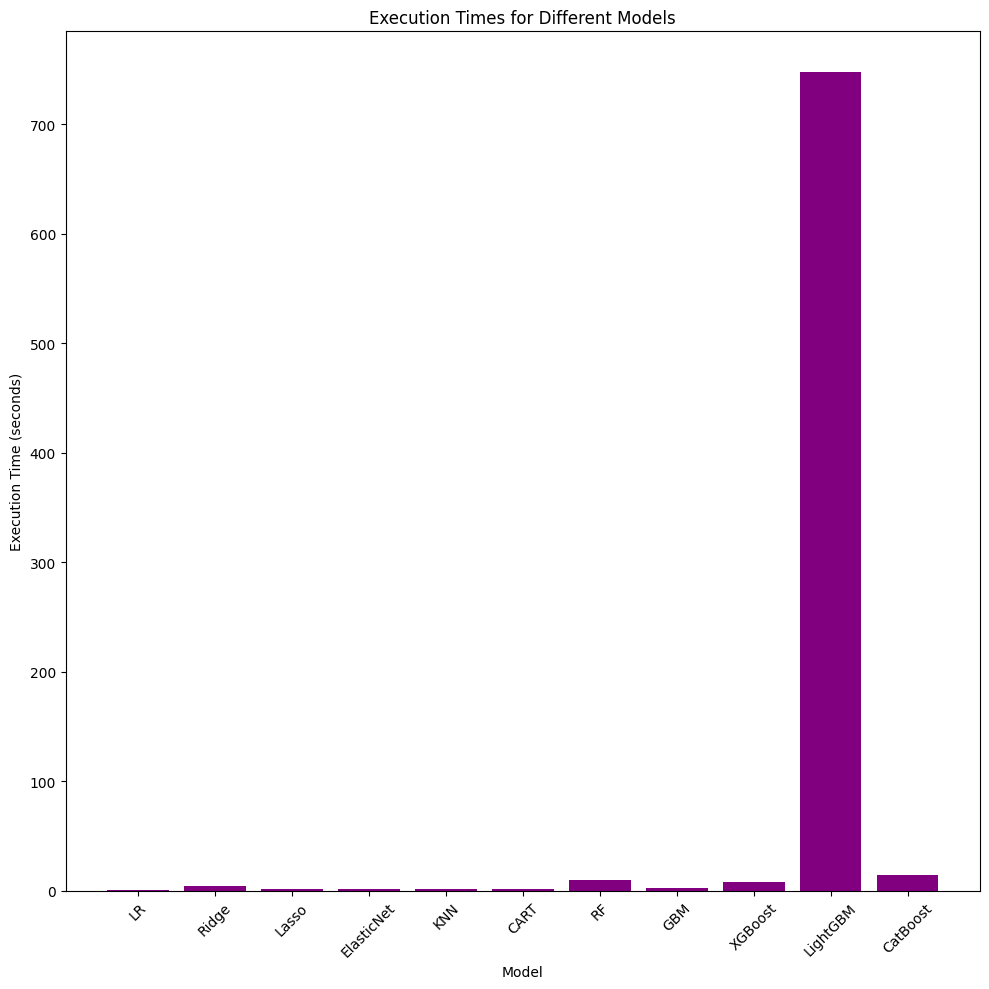

In [61]:
#Grafik hasil pasca grid
# Bagian Nilai RMSE
plt.figure(figsize=(10, 10))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R^2 scores
plt.figure(figsize=(10, 10))
plt.bar(results_df['Model'], results_df['R^2 Score'], color='lightgreen')
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.title("Model Performance (R^2 Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE scores
plt.figure(figsize=(10, 10))
plt.bar(results_df['Model'], results_df['MAE'], color='salmon')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Model Performance (MAE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MSE scores
plt.figure(figsize=(10, 10))
plt.bar(results_df['Model'], results_df['MSE'], color='gold')
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Model Performance (MSE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot execution times
plt.figure(figsize=(10, 10))
plt.bar(results_df['Model'], results_df['Execution Time (s)'], color='purple')
plt.xlabel("Model")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times for Different Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
#Deklarasi model terbaik
best_model = results_df.loc[results_df['R^2 Score'].idxmax(), 'Model']
print(f"Model terbaik adalah: {best_model}")

Model terbaik adalah: RF


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.